| Problem | Formula|Search Domain|
|---      |----    |----|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|

In [1]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
def calculate_hv(result):
    path = result['path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Iteration','Evaluations'],ascending =True).reset_index(drop=True)
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd_plus(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

# sk2
# sk2-typo
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [6]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
sk2_typo = result.loc[result['Problem']=='SK2_TYPO'].reset_index(drop=True)
sk2 = result.loc[result['Problem']=='SK2'].reset_index(drop=True)
print(f"The number of records sk2_typo {len(sk2_typo)}")
print(f"The number of records sk2 {len(sk2)}")

The number of records sk2_typo 48
The number of records sk2 48


# SK2_TYPO

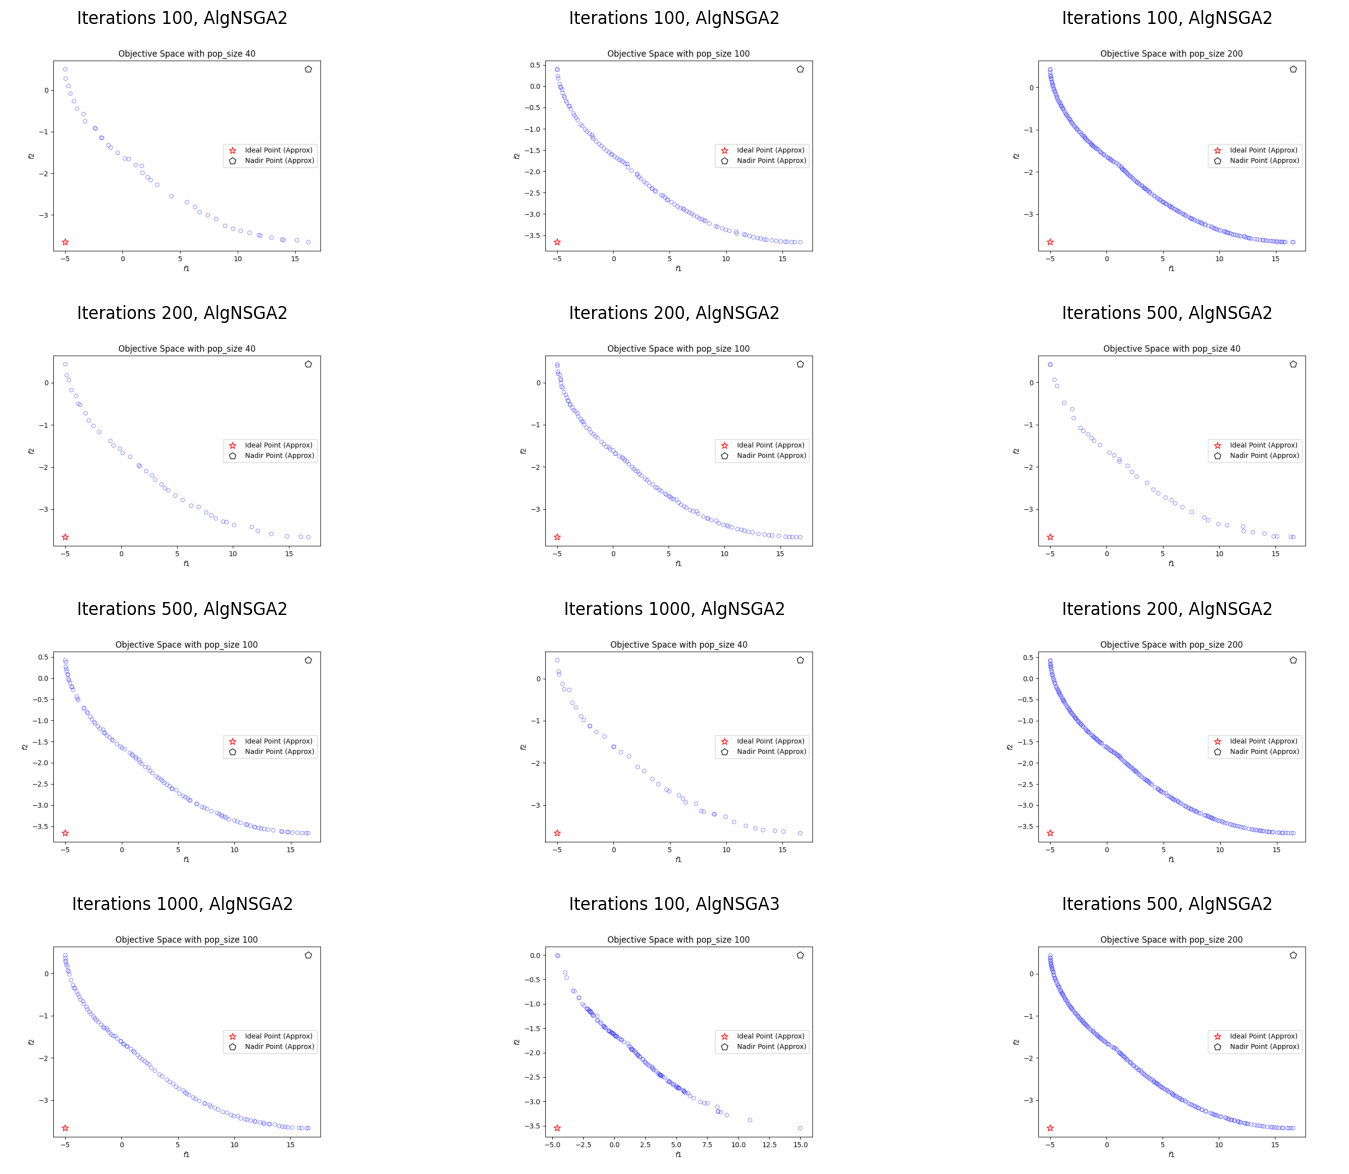

In [16]:
# more figures can be found here: Result/Images/sk2_typo/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(4,3,i+1)
    f = sk2_typo['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {sk2_typo.Iteration[i]}, Alg{sk2_typo.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [15]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(sk2_typo['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([18, 1 ])
hv_result(sk2_typo)

Global nadir point for kur1 with two variables is :[18.44  0.5 ]
ref_point is [18  1]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,SK2_TYPO,AGNOMEN,10000,100,2,4,40,2.366445,81.867431,0.001129
1,SK2_TYPO,AGNOMEN,10000,100,2,4,200,2.292486,81.867431,0.000488
2,SK2_TYPO,AGNOMEN,10000,100,2,4,100,2.258552,81.867431,0.000492
3,SK2_TYPO,AGNOMEN,20000,200,2,4,40,4.685284,81.890038,0.000501
4,SK2_TYPO,AGNOMEN,20000,200,2,4,100,4.888260,81.890038,0.000477
5,SK2_TYPO,AGNOMEN,20000,200,2,4,200,4.828655,81.890038,0.000473
6,SK2_TYPO,AGNOMEN,50000,500,2,4,100,12.404546,81.909559,0.000528
7,SK2_TYPO,AGNOMEN,50000,500,2,4,200,12.786601,81.909559,0.000591
8,SK2_TYPO,AGNOMEN,50000,500,2,4,40,12.925755,81.909559,0.000559
9,SK2_TYPO,AGNOMEN,100000,1000,2,4,200,24.930468,81.929407,0.001227


In [10]:
ref_point = np.array([5, 5 ])
hv_result(sk2_typo)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,SK2_TYPO,AGNOMEN,10000,100,2,4,40,2.366445,64.998112,0.000488
1,SK2_TYPO,AGNOMEN,10000,100,2,4,200,2.292486,64.998112,0.000473
2,SK2_TYPO,AGNOMEN,10000,100,2,4,100,2.258552,64.998112,0.000476
3,SK2_TYPO,AGNOMEN,20000,200,2,4,40,4.685284,65.078460,0.000527
4,SK2_TYPO,AGNOMEN,20000,200,2,4,100,4.888260,65.078460,0.001163
5,SK2_TYPO,AGNOMEN,20000,200,2,4,200,4.828655,65.078460,0.000407
6,SK2_TYPO,AGNOMEN,50000,500,2,4,100,12.404546,65.143799,0.000430
7,SK2_TYPO,AGNOMEN,50000,500,2,4,200,12.786601,65.143799,0.000386
8,SK2_TYPO,AGNOMEN,50000,500,2,4,40,12.925755,65.143799,0.000407
9,SK2_TYPO,AGNOMEN,100000,1000,2,4,200,24.930468,65.131405,0.000405


# SK2

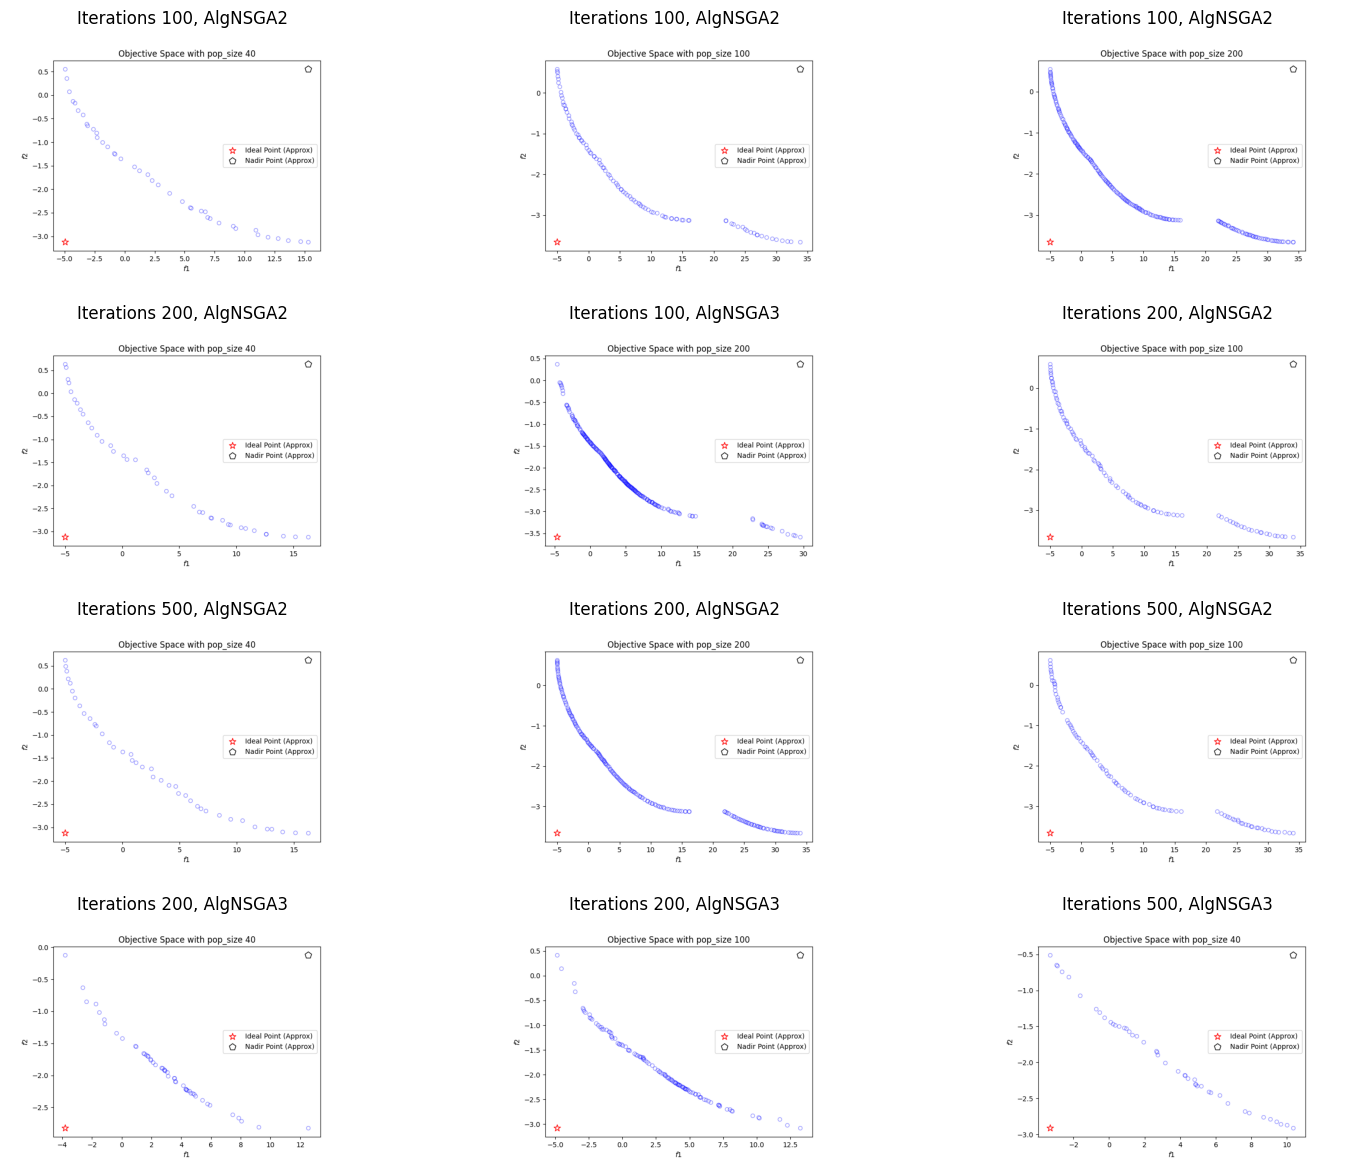

In [17]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(4,3,i+1)
    f = sk2['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {sk2.Iteration[i]}, Alg{sk2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [18]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(sk2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([35,0.5])
hv_result(sk2)

Global nadir point for kur1 with two variables is :[36.4   0.63]
ref_point is [35.   0.5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,SK2,AGNOMEN,10000,100,2,4,200,2.267557,127.939360,0.000500
1,SK2,AGNOMEN,10000,100,2,4,100,2.242508,127.939360,0.000497
2,SK2,AGNOMEN,10000,100,2,4,40,2.323725,127.939360,0.000486
3,SK2,AGNOMEN,20000,200,2,4,100,4.757333,127.913533,0.000472
4,SK2,AGNOMEN,20000,200,2,4,40,4.702648,127.913533,0.000992
5,SK2,AGNOMEN,20000,200,2,4,200,5.631060,127.913533,0.000465
6,SK2,AGNOMEN,50000,500,2,4,100,13.232461,128.026941,0.000546
7,SK2,AGNOMEN,50000,500,2,4,200,13.603090,128.026941,0.000492
8,SK2,AGNOMEN,50000,500,2,4,40,14.061337,128.026941,0.000477
9,SK2,AGNOMEN,100000,1000,2,4,40,27.328948,128.024820,0.000556


In [19]:
ref_point = np.array([5,5])
hv_result(sk2)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,SK2,AGNOMEN,10000,100,2,4,200,2.267557,62.617566,0.000540
1,SK2,AGNOMEN,10000,100,2,4,100,2.242508,62.617566,0.000438
2,SK2,AGNOMEN,10000,100,2,4,40,2.323725,62.617566,0.000378
3,SK2,AGNOMEN,20000,200,2,4,100,4.757333,62.529875,0.000456
4,SK2,AGNOMEN,20000,200,2,4,40,4.702648,62.529875,0.000476
5,SK2,AGNOMEN,20000,200,2,4,200,5.631060,62.529875,0.000518
6,SK2,AGNOMEN,50000,500,2,4,100,13.232461,62.663978,0.000362
7,SK2,AGNOMEN,50000,500,2,4,200,13.603090,62.663978,0.000369
8,SK2,AGNOMEN,50000,500,2,4,40,14.061337,62.663978,0.000452
9,SK2,AGNOMEN,100000,1000,2,4,40,27.328948,62.681521,0.000401
